# ANOVA and Chi Square 

In [1]:
import numpy             as np
import pandas            as pd
import scipy.stats       as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn           as sns
import math

### Practice Exercise 1

A company makes three types of electronic device.
Life time in hours for each type of electronic device is given below:

* life_type_A = [ 407, 411, 409 ]
* life_type_B = [ 404, 406, 408, 405, 402 ]
* ife_type_C  = [ 410, 408, 406, 408]

### Hint

In [2]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [3]:
life_type_A = np.array([407, 411, 409 ])
life_type_B = np.array([404, 406, 408, 405, 402 ])
life_type_C  = np.array([410, 408, 406, 408])

### a)  Plot box plot for the above data and write your inference on the group means from the boxplots.

In [4]:
life= pd.DataFrame()
d1=pd.DataFrame({"Life_type_A":life_type_A})
d2=pd.DataFrame({"Life_type_B":life_type_B})
d3=pd.DataFrame({"Life_type_C":life_type_C})
life=life.append(d1)
life=life.append(d2)
life=life.append(d3)
life=pd.melt(life,value_vars=["Life_type_A","Life_type_B","Life_type_C"],value_name="Life_type")
life.head()


,variable,Life_type
0,Life_type_A,407.0
1,Life_type_A,411.0
2,Life_type_A,409.0
3,Life_type_A,NaN
4,Life_type_A,NaN


<AxesSubplot:xlabel='variable', ylabel='Life_type'>

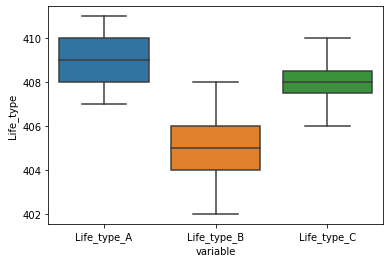

In [5]:
sns.boxplot(x="variable",y="Life_type",data=life)

### b)  At 5% level of significance, is there any difference in the average lifetimes of the three types?

In [6]:
life.shape

(36, 2)

In [7]:
import scipy.stats as stats
fcrit=stats.f.ppf(0.95,dfn=2,dfd=12-3)

In [8]:
import statsmodels.api as sm # Anova table generates using library
# in order to fit Anova on data, we use ols( Regression Algorithm)
from statsmodels.formula.api import ols
model=ols("Life_type~variable",data=life).fit()
print(sm.stats.anova_lm(model))

           df  sum_sq  mean_sq    F    PR(>F)
variable  2.0    36.0     18.0  4.5  0.044194
Residual  9.0    36.0      4.0  NaN       NaN


### c)  If  you were able to reject the null hypothesis, you can proceed with post-hoc analysis to determine which means are different 

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(life['variable'],life['Life_type']))
# there are no difference between life type of bulb manufactured

### Practice Exercise 2

### A sample of number of sell of a particular product over different days in different stores have been collected.Perform a test to check whether different stores and different days have any effect on the number of products that have been sold.

In [9]:
table1  = [['Day','Store-A','Store-B','Store-C','Store-D','Store-E'], [1,69, 71, 64, 67, 56],\
           [2, 68, 76, 79, 87, 76], [3, 71, 77, 74, 84, 72], [4, 70, 73, 71, 78, 73], [5, 60, 64, 67, 79, 58]]

In [10]:

headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
df1

,Day,Store-A,Store-B,Store-C,Store-D,Store-E
0,1,69,71,64,67,56
1,2,68,76,79,87,76
2,3,71,77,74,84,72
3,4,70,73,71,78,73
4,5,60,64,67,79,58


In [11]:
df2 = pd.melt(df1, id_vars = ['Day'], value_vars = df1.columns[1:],
             var_name = 'Store', value_name = 'Quantity')
df2

,Day,Store,Quantity
0,1,Store-A,69
1,2,Store-A,68
2,3,Store-A,71
3,4,Store-A,70
4,5,Store-A,60
5,1,Store-B,71
6,2,Store-B,76
7,3,Store-B,77
8,4,Store-B,73
9,5,Store-B,64


In [12]:
df2.columns

Index(['Day', 'Store', 'Quantity'], dtype='object')

In [13]:
import statsmodels.api as sm # Anova table generates using library
# in order to fit Anova on data, we use ols( Regression Algorithm)
from statsmodels.formula.api import ols

model=ols("Quantity~C(Day)+Store+Day:Store",data=df2).fit()
print(sm.stats.anova_lm(model))

             df      sum_sq     mean_sq         F    PR(>F)
C(Day)      4.0  617.360000  154.340000  8.721416  0.001536
Store       4.0  461.760000  115.440000  6.523262  0.004994
Day:Store   5.0  112.035119   22.407024  1.266172  0.339688
Residual   12.0  212.360000   17.696667       NaN       NaN


## Chi Square

### Practice Exercise 3

A1 airlines operated daily flights to several Indian cities. The operations manager believes that 28% of their passengers prefer vegan food, 42% prefer vegetarian food , 25% prefer non-veg food 5% request for Jain food. 

A sample of 500 passengers was chosen to analyse the food preferences and the data is shown in the following table:

|               | Food type | Vegan | Vegetarian | Non-Vegetarian | Jain |
| ------------------------- | ---- | ---- | ----- | ---- | ---- |
|Number of passengers |  | 190 | 185 | 90 | 35 |

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

In [14]:
import scipy.stats as stats
import scipy

observed_values    = scipy.array([190, 185, 90, 35])
n                  = observed_values.sum()


C:\Users\LAPTOP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  after removing the cwd from sys.path.


In [15]:
exp=[500*0.28,500*0.42,500*0.25,500*0.05]
teststats,pvalue = stats.chisquare(observed_values,exp)
if(pvalue<0.05):
    print("Reject Ho")
else:
    print("Fail to Reject Ho")

Reject Ho


### Chi-square tests of independence

### Practice Exercise 4

A Cable service provider company is interested in checking whether or not the customer churn depends on customer segment.  Use 5% as level of significance

| Customer Segment | Churned | Retained |
|  -------- | ----- | ---- |
| S1 | 15 | 142 |
| S2 | 24 | 400 |
| S3 | 30 | 389 |


#### Hint

In [16]:
import numpy       as np
import scipy.stats as stats

churn_array = np.array([[15,142],[24, 400],[30, 389]])


In [17]:
teststats,pvalue,df,exp=stats.chi2_contingency(churn_array)
print(pvalue)
if(pvalue<0.05):
    print("Reject Ho")
else:
    print("Fail to Reject Ho")

0.24907816314986156
Fail to Reject Ho


## E N D  